In [38]:
# Import Libraries

from textblob import TextBlob  
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
import collections
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
# Authentication Key for Tweeter API
consumerKey = ""
consumerSecret = ""
accessToken = ""
accessTokenSecret = ""

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [41]:
#input function
keyword = input("\033[1m" +"Please enter keyword or hashtag to search: "+ "\033[0m")
while True:
    try:
        number_of_tweet_to_analyze = int(input("\033[1m"+"Please enter how many tweets to analyze: "+ "\033[0m"))
        break
    except ValueError:
        print("\033[1m" + "Please input integer only..." + "\033[0m")  
        continue

#twitter API
tweets = tweepy.Cursor(api.search,q=keyword, result_type="recent", tweet_mode="extended").items(number_of_tweet_to_analyze)

tweet_list=[]


for tweet in tweets:
    tweet_list.append(tweet.full_text)
    print(tweet.full_text + "\n")

Please enter keyword or hashtag to search: omega speedmaster
Please enter how many tweets to analyze: 75
Omega Speedmaster Automatic Moon Blue Dial. https://t.co/ROxlA7xQoq

#Omega 
#SpeedmasterAutomatic 
#Horology https://t.co/3YSyNFaVgf

RT @BasileDesquiens: @JTTsteve Omega Speedmaster with a nylon nato strap really comfy! https://t.co/owfiEIfba7

#omega #speedmaster #351050 #sold to #collector in #evanston #il - more #watches #forsale at #watchvaultnyc Shop for more like this here https://t.co/vDYM1XC5o0 https://t.co/Yxn2cyeOK9

@SteveSchmidtSES @POTUS If he had worn his similarly priced Omega Speedmaster Moon watch how differently would this have been covered?

@littledeekay Not me. I am not a big Rolex fan. I like his Omega Speedmaster better. But, that’s just my preference. What I am pissed off about is his hard turn to the left.

@reconsidered My tiny collection.
50 y/o Omega Speedmaster, 80 y/o Lord Elgin and a modern Breitling Colt Superquartz I use to set the hand winding mov

@KimMangone (And he also has an Omega Speedmaster Mooneatch like me 😅😅)

RT @WarrenPlatts: "Mr. Biden is unafraid to show off his haute Swiss watches, all stainless steel, including his $7,000 Rolex, an Omega Spe…

RT @Here_Tuu_: สงสัย Omega Speedmaster ราคาจะวิ่ง เพราะประธานาธิบดีโจไบเดนใส่

"Mr. Biden is unafraid to show off his haute Swiss watches, all stainless steel, including his $7,000 Rolex, an Omega Speedmaster Moonwatch Professional &amp; Omega Seamaster Diver 300M both of which retail for about $5,000 or $6,000."

😻😻NICE GIFTS!😻😻😻

https://t.co/efcxrTh4Pc https://t.co/sgMs16LPH1

RT @PuristSPro: #Speedmaster MW Cal 3861
https://t.co/ZnVNNRqIRi
#Omega https://t.co/OT9XMES2sx

Biden Part 2: Omega Speedmaster Professional Moonwatch. https://t.co/SJ0aD6y07J

สงสัย Omega Speedmaster ราคาจะวิ่ง เพราะประธานาธิบดีโจไบเดนใส่

@josh_posts He’s got a collection of nice watches. The Rolex he bought after he won the election, an Omega Seamaster and Speedmaster Moonwatch, and a Seiko Chro

In [42]:
# create dataframe with tweet_list and rename column
df = pd.DataFrame(tweet_list)
df.columns=["Tweets"]
df

,Tweets
0,Omega Speedmaster Automatic Moon Blue Dial. ht...
1,RT @BasileDesquiens: @JTTsteve Omega Speedmast...
2,#omega #speedmaster #351050 #sold to #collecto...
3,@SteveSchmidtSES @POTUS If he had worn his sim...
4,@littledeekay Not me. I am not a big Rolex fan...
...,...
70,@MaryPoopins5 Let’s concentrate on the disaste...
71,@tgtrojan That Rolex cost what maybe 8k tops ?...
72,RT @withhyunbin: Hyun Bin attends OMEGA Speedm...
73,"@TwinLensReflux picked out a modest piece, not..."


In [43]:
# drop duplicates and delete nan values
df["Tweets"].drop_duplicates(inplace = True)
df = df.dropna(how='any',axis=0) 
df["Tweets"]= df["Tweets"].str.lower()

In [44]:
# function for clean text 
def clean_text(Text):
    Text = re.sub('@[\w]+', "", str(Text))
    Text = re.sub(r"[^a-zA-Z]", " ", str(Text))
    Text = re.sub(r"#", " ", str(Text))
    Text = re.sub(r"rt[\s]+", " ", str(Text))
    Text = re.sub(r"http\S+", " ", str(Text))
    
    return Text

In [45]:
df["cleaning_tweets"]=df["Tweets"].apply(clean_text)
df.head(5)

,Tweets,cleaning_tweets
0,omega speedmaster automatic moon blue dial. ht...,omega speedmaster automatic moon blue dial ...
1,rt @basiledesquiens: @jttsteve omega speedmast...,omega speedmaster with a nylon nato strap rea...
2,#omega #speedmaster #351050 #sold to #collecto...,omega speedmaster sold to collecto...
3,@steveschmidtses @potus if he had worn his sim...,if he had worn his similarly priced omega sp...
4,@littledeekay not me. i am not a big rolex fan...,not me i am not a big rolex fan i like his ...


In [46]:
#Sentiment Analysis: Polarity ranges from -1 (most negative) to 1 (most positive).
def polarity (cleaning_tweets):
    text = TextBlob(cleaning_tweets).sentiment.polarity
    return text
    
def subjectivity (cleaning_tweets):    
    text = TextBlob(cleaning_tweets).sentiment.subjectivity
    return text
    
df["polarity"]=df["cleaning_tweets"].apply(polarity)
df["subjectivity"]=df["cleaning_tweets"].apply(subjectivity)
df

,Tweets,cleaning_tweets,polarity,subjectivity
0,omega speedmaster automatic moon blue dial. ht...,omega speedmaster automatic moon blue dial ...,0.000000,0.100000
1,rt @basiledesquiens: @jttsteve omega speedmast...,omega speedmaster with a nylon nato strap rea...,0.200000,0.200000
2,#omega #speedmaster #351050 #sold to #collecto...,omega speedmaster sold to collecto...,0.500000,0.500000
3,@steveschmidtses @potus if he had worn his sim...,if he had worn his similarly priced omega sp...,0.000000,0.500000
4,@littledeekay not me. i am not a big rolex fan...,not me i am not a big rolex fan i like his ...,0.052083,0.285417
...,...,...,...,...
70,@marypoopins5 let’s concentrate on the disaste...,let s concentrate on the disaster that trump ...,0.228571,0.317857
71,@tgtrojan that rolex cost what maybe 8k tops ?...,that rolex cost what maybe k tops joe bide...,0.266667,0.496296
72,rt @withhyunbin: hyun bin attends omega speedm...,hyun bin attends omega speedmaster moonwatch...,0.250000,0.333333
73,"@twinlensreflux picked out a modest piece, not...",picked out a modest piece not even a fluted ...,-0.104167,0.416667


In [47]:
#decimal formatting
df=df.round({'polarity': 2, 'subjectivity': 2})
df

,Tweets,cleaning_tweets,polarity,subjectivity
0,omega speedmaster automatic moon blue dial. ht...,omega speedmaster automatic moon blue dial ...,0.00,0.10
1,rt @basiledesquiens: @jttsteve omega speedmast...,omega speedmaster with a nylon nato strap rea...,0.20,0.20
2,#omega #speedmaster #351050 #sold to #collecto...,omega speedmaster sold to collecto...,0.50,0.50
3,@steveschmidtses @potus if he had worn his sim...,if he had worn his similarly priced omega sp...,0.00,0.50
4,@littledeekay not me. i am not a big rolex fan...,not me i am not a big rolex fan i like his ...,0.05,0.29
...,...,...,...,...
70,@marypoopins5 let’s concentrate on the disaste...,let s concentrate on the disaster that trump ...,0.23,0.32
71,@tgtrojan that rolex cost what maybe 8k tops ?...,that rolex cost what maybe k tops joe bide...,0.27,0.50
72,rt @withhyunbin: hyun bin attends omega speedm...,hyun bin attends omega speedmaster moonwatch...,0.25,0.33
73,"@twinlensreflux picked out a modest piece, not...",picked out a modest piece not even a fluted ...,-0.10,0.42


In [48]:
# create qualitative column by polarity function 
def rating (points):
    if points < 0:
        return "negative"
    elif points ==0:
        return "neutral"
    else:
        return "positive"

In [49]:
df["rating"]=df["polarity"].apply(rating)
df.head(2)

,Tweets,cleaning_tweets,polarity,subjectivity,rating
0,omega speedmaster automatic moon blue dial. ht...,omega speedmaster automatic moon blue dial ...,0.0,0.1,neutral
1,rt @basiledesquiens: @jttsteve omega speedmast...,omega speedmaster with a nylon nato strap rea...,0.2,0.2,positive


In [50]:
# Printing positive tweets 
print('Printing positive tweets:\n')
sortedDF = df.sort_values(by=['polarity']) 

#Sort the tweets
for i in range(0, sortedDF.shape[0] ):
      if( sortedDF['rating'][i] == 'positive'):
        print(sortedDF['Tweets'][i])
        print()

Printing positive tweets:

rt @basiledesquiens: @jttsteve omega speedmaster with a nylon nato strap really comfy! https://t.co/owfieifba7

#omega #speedmaster #351050 #sold to #collector in #evanston #il - more #watches #forsale at #watchvaultnyc shop for more like this here https://t.co/vdym1xc5o0 https://t.co/yxn2cyeok9

@littledeekay not me. i am not a big rolex fan. i like his omega speedmaster better. but, that’s just my preference. what i am pissed off about is his hard turn to the left.

@reconsidered my tiny collection.
50 y/o omega speedmaster, 80 y/o lord elgin and a modern breitling colt superquartz i use to set the hand winding movements. https://t.co/0u4p6xuo0o

omega speedmaster racing michael schumacher watch box set + free shipping price: us $328.00 with best offer #omega https://t.co/ionkynpc60 #omega #omegawatchbox #omegabooklet https://t.co/xili2nyxki

omega speedmaster racing michael schumacher watch box set + free shipping price: us $328.00 with best offer #omega h

In [51]:
# Printing negative tweets 
print('Printing negative tweets:\n')
sortedDF = df.sort_values(by=['polarity']) 

#Sort the tweets
for i in range(0, sortedDF.shape[0] ):
      if( sortedDF['rating'][i] == 'negative'):
        print(sortedDF['Tweets'][i])
        print()

Printing negative tweets:

@itsjefftiedrich @c_arolin_e77 @nytimes have done a great job increasing the value of rolex's. now if you can just find another liberal wearing an omega speedmaster to get some hysterical faux indignation about, that would be of enormous help, thank you!

rt @stevehoffmantv: the watches worn by joe biden have been widely discussed by watch lovers like me – his omega seamaster, speedmaster moo…

rt @stevehoffmantv: the watches worn by joe biden have been widely discussed by watch lovers like me – his omega seamaster, speedmaster moo…

disappointed in biden’s rolex, i was hoping he was an omega speedmaster guy https://t.co/ldnjn5pwby

rt @stevehoffmantv: the watches worn by joe biden have been widely discussed by watch lovers like me – his omega seamaster, speedmaster moo…

@twinlensreflux picked out a modest piece, not even a fluted bezel. shows how brand goes a long way. no one complained when he had an omega speedmaster on in a previous shoot. or his seamast

In [52]:
# Printing neutral tweets 
print('Printing neutral tweets:\n')
sortedDF = df.sort_values(by=['polarity']) 

#Sort the tweets
for i in range(0, sortedDF.shape[0] ):
      if( sortedDF['rating'][i] == 'neutral'):
        print(sortedDF['Tweets'][i])
        print()

Printing neutral tweets:

omega speedmaster automatic moon blue dial. https://t.co/roxla7xqoq

#omega 
#speedmasterautomatic 
#horology https://t.co/3ysynfavgf

@steveschmidtses @potus if he had worn his similarly priced omega speedmaster moon watch how differently would this have been covered?

rt @jearle: the stingray and the speedmaster were both symbols of apollo astronauts; the omega was space-certified and a local chevrolet de…

@lou_mannheim inte en omega speedmaster då? helt fantastiska ur

@rj_bluewave @2020survivor16 i’ve wanted an omega speedmaster for some time.  if i changed careers and wanted to splurge, i would go for a audemars piguet royal oaks.

omega snowmaster ❄️ ⛄️ 
been looking forward to giving my speedy a proper wrist time! 
#snow #winter #weekend #omega #speedmaster #moonwatch #watchcollector #lifestyle #wristwatch #wristshot #seenthroughwrist https://t.co/islj2qodbx

rt @tolledingehh: 4 sale omega speedmaster automatic chronograph mk 4.5 70s 42mm day date ref.

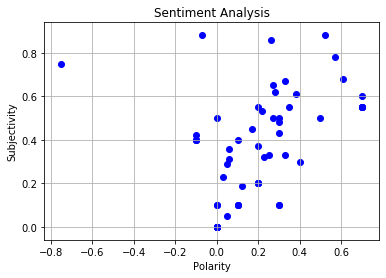

In [53]:
#Plot scatter visualization for see the Polarity of Tweets
plt.scatter(df.polarity, df.subjectivity, color='Blue')

plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.grid()

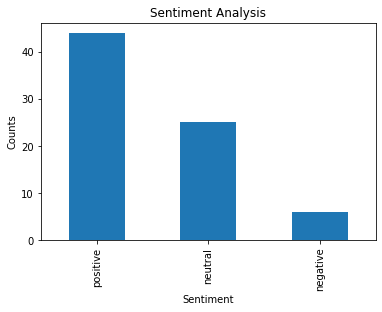

In [54]:
#Plotting and visualizing the counts Tweets
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['rating'].value_counts().plot(kind = 'bar')
plt.show()

In [55]:
#Creating new data frames for all sentiments (positive, negative and neutral)

df_negative = df[df["rating"]=="negative"]
df_positive = df[df["rating"]=="positive"]
df_neutral = df[df["rating"]=="neutral"]

In [56]:
print("total number: ",len(df["rating"]))
print("positive number: ",len(df_positive["rating"]))
print("negative number: ",len(df_negative["rating"]))
print("neutral number: ",len(df_neutral["rating"]))

total number:  75
positive number:  44
negative number:  6
neutral number:  25


In [57]:
#Create Wordcloud
def create_wordcloud(text):
    
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="black",
                  max_words=200,
                  stopwords=stopwords,
                  width=1200,
                  height=800,
                  repeat=True)
    
    wc.generate(str(text))
   
    print("Word Cloud generate Successfully")
    plt.figure( figsize=(16,9), facecolor="k")
    plt.imshow(wc,interpolation="bilinear")
    plt.axis('off')
    
    plt.show()

Word Cloud generate Successfully


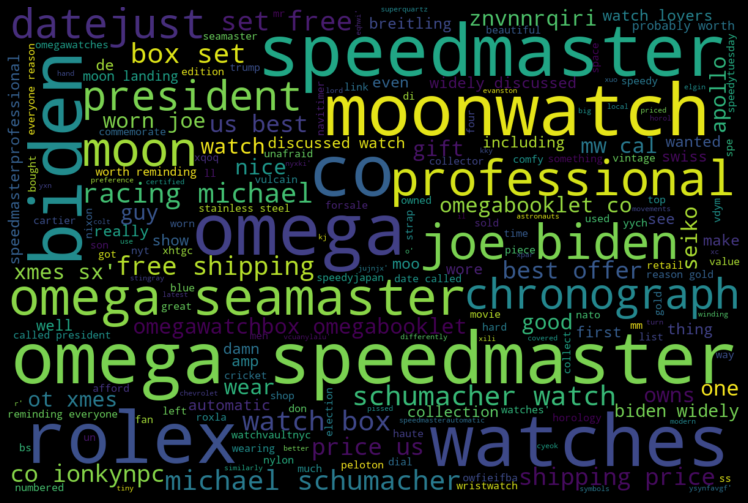

In [58]:
#Creating wordcloud for all tweets
all_tweets= create_wordcloud(df["cleaning_tweets"].values)

Word Cloud generate Successfully


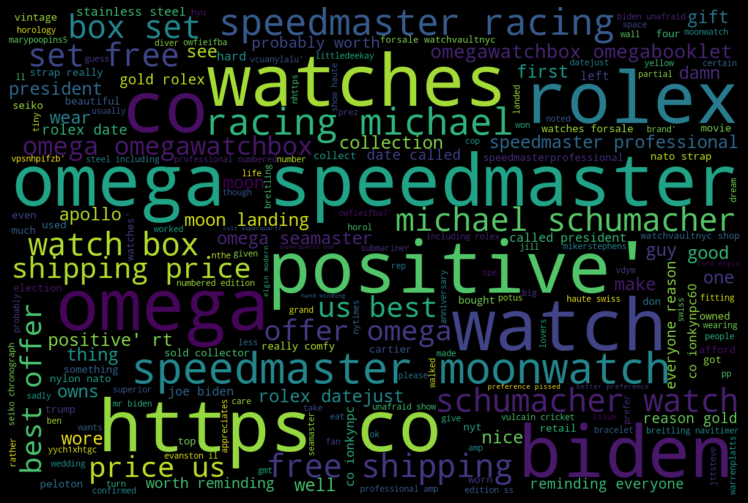

In [59]:
#Wordcloud Positive Tweets
create_wordcloud(df_positive.values)

Word Cloud generate Successfully


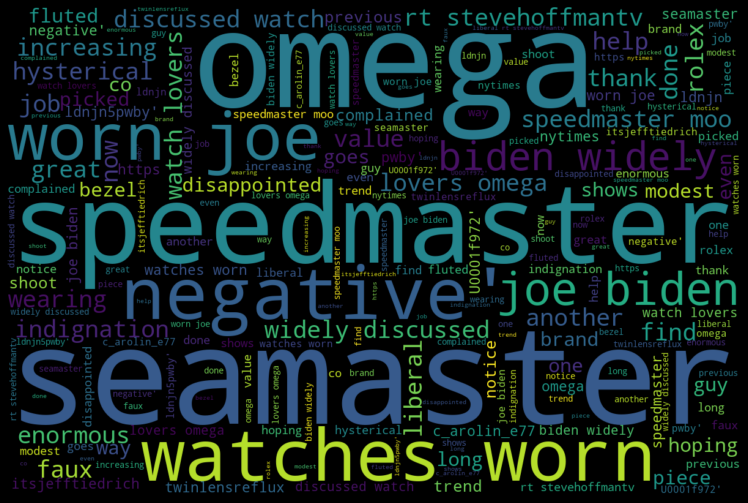

In [60]:
#Wordcloud Negative Tweets
create_wordcloud(df_negative.values)

In [61]:
#Calculating tweet's lenght and word count

df["text_word_count"] = df["cleaning_tweets"].apply(lambda x: len(str(x).split()))
df["text_lenght"] = df["cleaning_tweets"].astype(str).apply(len)
df.head(2)

,Tweets,cleaning_tweets,polarity,subjectivity,rating,text_word_count,text_lenght
0,omega speedmaster automatic moon blue dial. ht...,omega speedmaster automatic moon blue dial ...,0.0,0.1,neutral,16,125
1,rt @basiledesquiens: @jttsteve omega speedmast...,omega speedmaster with a nylon nato strap rea...,0.2,0.2,positive,12,76


In [63]:
#Tokenization our 4 dataframe: principal df,  Positive, Negative, Neutral
df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row['cleaning_tweets']), axis=1)

df_positive['tokenized_sents'] = df_positive.apply(lambda row: nltk.word_tokenize(row['cleaning_tweets']), axis=1)
df_negative['tokenized_sents'] = df_negative.apply(lambda row: nltk.word_tokenize(row['cleaning_tweets']), axis=1)
df_neutral['tokenized_sents'] = df_neutral.apply(lambda row: nltk.word_tokenize(row['cleaning_tweets']), axis=1)
df_positive.head(2)

,Tweets,cleaning_tweets,polarity,subjectivity,rating,tokenized_sents
1,rt @basiledesquiens: @jttsteve omega speedmast...,omega speedmaster with a nylon nato strap rea...,0.2,0.2,positive,"[omega, speedmaster, with, a, nylon, nato, str..."
2,#omega #speedmaster #351050 #sold to #collecto...,omega speedmaster sold to collecto...,0.5,0.5,positive,"[omega, speedmaster, sold, to, collector, in, ..."


In [78]:
#Apply stopwords for all dataframe
stop_words=stopwords.words('english')
stop_words.extend(["co","k"])

df['token_sw'] = df['tokenized_sents'].apply(lambda x: [item for item in x if item not in stop_words])

df_positive['token_sw'] = df_positive['tokenized_sents'].apply(lambda x: [item for item in x if item not in stop_words])
df_negative['token_sw'] = df_negative['tokenized_sents'].apply(lambda x: [item for item in x if item not in stop_words])
df_neutral['token_sw'] = df_neutral['tokenized_sents'].apply(lambda x: [item for item in x if item not in stop_words])

In [79]:
#create for every df lists with all words token 
df_tweets_list=df["token_sw"].sum()

Positive_tweets_list=df_positive["token_sw"].sum()
Negative_tweets_list=df_negative["token_sw"].sum()
Neutral_tweets_list=df_neutral["token_sw"].sum()

In [80]:
#pass the lists for count the most common Tweets for Positive,Negative and Neutral sentiments
df_counts_no_urls = collections.Counter(df_tweets_list)

Pos_counts_no_urls = collections.Counter(Positive_tweets_list)
Neg_counts_no_urls = collections.Counter(Negative_tweets_list)
Neu_counts_no_urls = collections.Counter(Neutral_tweets_list)

In [81]:
#most common words in all Tweets
df_counts_no_urls.most_common(10)

[('omega', 90),
 ('speedmaster', 70),
 ('rolex', 23),
 ('watch', 22),
 ('biden', 18),
 ('watches', 17),
 ('like', 12),
 ('moonwatch', 10),
 ('us', 9),
 ('seamaster', 9)]

In [82]:
#most common words in Positive Df
Pos_counts_no_urls.most_common(10)

[('omega', 55),
 ('speedmaster', 40),
 ('rolex', 20),
 ('watch', 17),
 ('biden', 14),
 ('watches', 13),
 ('like', 8),
 ('us', 8),
 ('professional', 7),
 ('moonwatch', 7)]

In [83]:
##most common words in Negative Df
Neg_counts_no_urls.most_common(10)

[('omega', 6),
 ('speedmaster', 6),
 ('biden', 4),
 ('seamaster', 4),
 ('watches', 3),
 ('worn', 3),
 ('joe', 3),
 ('widely', 3),
 ('discussed', 3),
 ('watch', 3)]

In [84]:
##most common words in Neutral Df
Neu_counts_no_urls.most_common(10)

[('omega', 29),
 ('speedmaster', 24),
 ('mw', 4),
 ('cal', 4),
 ('znvnnrqiri', 4),
 ('ot', 4),
 ('xmes', 4),
 ('sx', 4),
 ('automatic', 3),
 ('de', 3)]

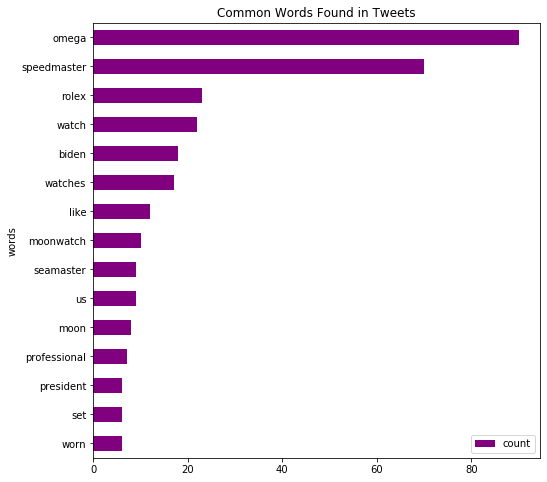

In [86]:
# Most common words in Horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
Clean_df_counts_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets")

plt.show()

In [87]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [88]:
#n2_bigram
n2_bigrams = get_top_n_gram(df['cleaning_tweets'],(2,2),20)

n2_bigrams

[('omega speedmaster', 51),
 ('omega seamaster', 8),
 ('speedmaster moonwatch', 7),
 ('joe biden', 6),
 ('seamaster speedmaster', 6),
 ('like omega', 5),
 ('speedmaster racing', 5),
 ('racing michael', 5),
 ('michael schumacher', 5),
 ('schumacher watch', 5),
 ('watch box', 5),
 ('box set', 5),
 ('set free', 5),
 ('free shipping', 5),
 ('shipping price', 5),
 ('price best', 5),
 ('best offer', 5),
 ('offer omega', 5),
 ('omega ionkynpc', 5),
 ('ionkynpc omega', 5)]

In [89]:
#n3_trigram
n3_trigrams = get_top_n_gram(df['cleaning_tweets'],(3,3),20)

n3_trigrams

[('omega seamaster speedmaster', 6),
 ('omega speedmaster racing', 5),
 ('speedmaster racing michael', 5),
 ('racing michael schumacher', 5),
 ('michael schumacher watch', 5),
 ('schumacher watch box', 5),
 ('watch box set', 5),
 ('box set free', 5),
 ('set free shipping', 5),
 ('free shipping price', 5),
 ('shipping price best', 5),
 ('price best offer', 5),
 ('best offer omega', 5),
 ('offer omega ionkynpc', 5),
 ('omega ionkynpc omega', 5),
 ('ionkynpc omega omegawatchbox', 5),
 ('omega omegawatchbox omegabooklet', 5),
 ('omega speedmaster professional', 4),
 ('speedmaster mw cal', 4),
 ('mw cal znvnnrqiri', 4)]